In [13]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import newton
import scipy.integrate as it

In [14]:
def V(x, type=0):
    if type == 0:
        return V0(x)
    elif type == 1:
        return V1(x)
    elif type == 2:
        return V2(x)
    elif type == 3:
        return V3(x)
    elif type == 4:
        return V4(x)
    else:
        raise ValueError("Invalid type")

In [15]:
def V0(x):
    V0 = 5
    a = 1.5/2
    if abs(x) > a:
        return V0
    else:
        return 0

In [16]:
def V1(x):
    V0 = 5
    a = 1.5/2
    if x<-a:
        return 100
    elif x>a:
        return V0
    else:
        return 0

In [17]:
def V2(x):
    V1 = 4
    V2 = 7
    a = 1.5/2
    b = 0.5/2
    if abs(x) > a:
        return V2
    elif abs(x) < b:
        return V1
    else:
        return 0

In [18]:
def V3(x):
    V1 = 4
    V2 = 7
    a = 1.5/2
    if x<-a:
        return V2
    elif 0<x<a:
        return V1
    elif x>a:
        return V2
    else:
        return 0

In [19]:
def V4(x):
    return abs(x)

In [28]:
def ODE(phi, x, E, V_type=0):
    m = 511e3
    hbar = 1240 / (2 * np.pi)
    phi, z = phi
    dphidx=[z, -2*m/hbar**2 * (E - V(x, V_type)) * phi]
    return dphidx

In [29]:
def error(E, FBV, V_type=0):
    a = 1.5/2
    initial = [0, 0.1]
    x = np.linspace(-2.5*a, 2.5*a, 1000)
    
    SOL = odeint(ODE, initial, x, args=(E,V_type))
    return SOL[-1, 0] - FBV

In [30]:
def find_eigenvalue(seed_E, V_type=0):
    IBV = 0
    FBV = 0
    a = 1.5/2
    
    E = newton(error, seed_E, args=(FBV, V_type))
    
    x = np.linspace(-2.5*a, 2.5*a, 1000)
    initial = [IBV, 0.1]
    SOL = odeint(ODE, initial, x, args=(E, V_type))
    return SOL, E

In [84]:
SOLs = []
Es = []
a = 1.5/2
x = np.linspace(-2.5*a, 2.5*a, 1000)
i=0
V_type = 2
while len(Es) < 6:
    if i > 100:
        break
    try:
        SOL, E = find_eigenvalue(i*0.5, V_type)
    except:
        print(f"Failed to find eigenvalue for i = {i}")
        i+=1
        continue
    i+=1
    if np.round(E, 1) not in Es:
        Es.append(np.round(E, 1))
        N = 1/it.simpson(SOL[:, 0]**2, x)
        normalized = SOL[:, 0] * np.sqrt(N)
        double_check = it.simpson(normalized**2, x)
        
        well = x[np.where(np.abs(x) <= a)]
        well_wavefunction = normalized[np.where(np.abs(x) <= a)]

        well_probability = it.simpson(well_wavefunction**2, well)
        print(f"Eigenvalue = {E}")
        
        print(f"n = {i+1}, N = {N}, double check = {double_check}, well probability = {well_probability}")
        SOLs.append((normalized, E, double_check, well_probability))
    

Eigenvalue = 0.8172643942071518
n = 2, N = 3.921031042674282e-09, double check = 0.9999999999999997, well probability = 0.9863158551897517
Eigenvalue = 3.017708195623352
n = 5, N = 2.2197977692869576e-06, double check = 0.9999999999999998, well probability = 0.9481811893455129
Failed to find eigenvalue for i = 7
Eigenvalue = 5.069234430457353
n = 10, N = 0.0009314523081009398, double check = 0.9999999999999999, well probability = 0.9408016696770041
Eigenvalue = 6.247931260231152
n = 13, N = 0.31382156923857457, double check = 0.9999999999999999, well probability = 0.8020128199998123
Eigenvalue = 7.145605722605633
n = 15, N = 200.02530968519815, double check = 0.9999999999999998, well probability = 0.2829081588390689
Eigenvalue = 7.5098305707655815
n = 17, N = 854.2326194039696, double check = 1.0, well probability = 0.36186953241139674


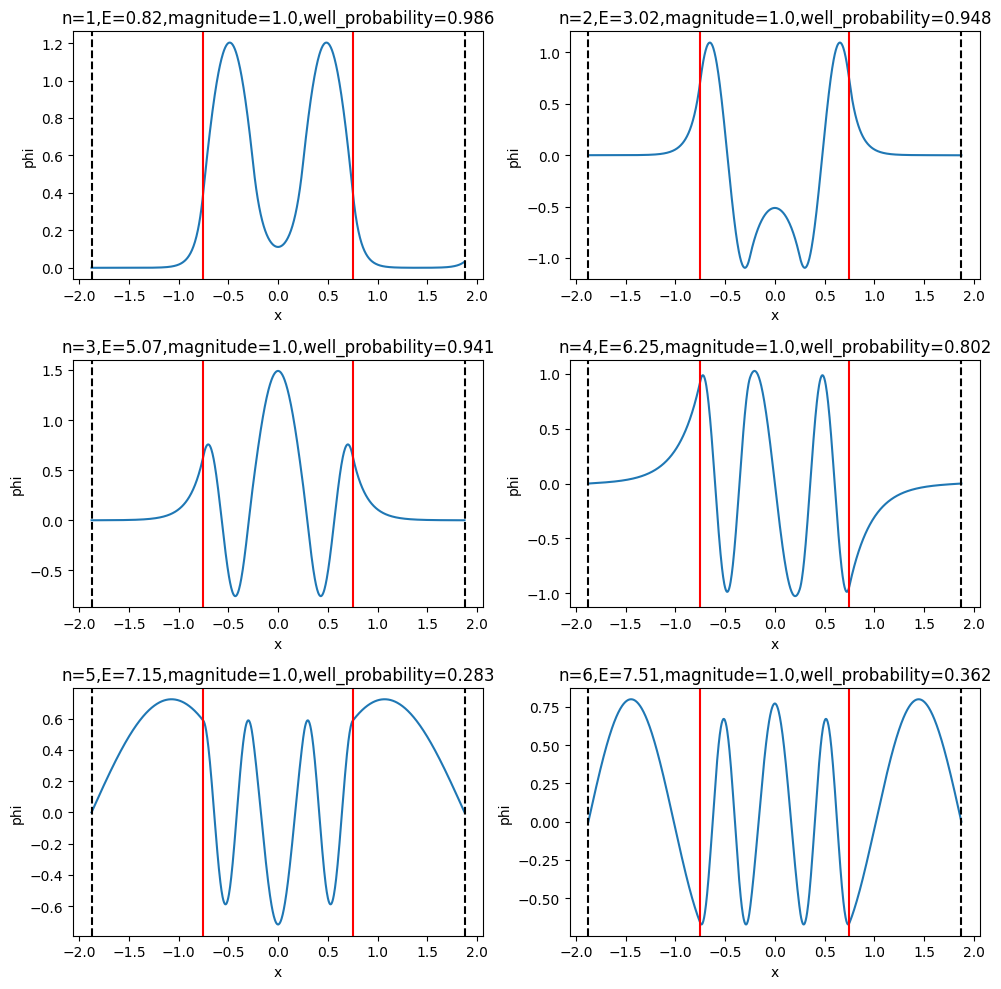

In [85]:
# Make a bunch of subplots with clearly defined n
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.ravel()
a = 1.5/2
for i, (normalized, E, double_check, well_probability) in enumerate(SOLs):
    axs[i].plot(np.linspace(-2.5*a, 2.5*a, 1000), normalized)
    # Vertical lines to show the well
    axs[i].axvline(-a, color='r', linestyle='-')
    axs[i].axvline(a, color='r', linestyle='-')
    axs[i].axvline(-2.5*a, color='k', linestyle='--')
    axs[i].axvline(2.5*a, color='k', linestyle='--')
        
    axs[i].set_title(f"n={i+1},E={E:.2f},magnitude={double_check:.1f},well_probability={well_probability:.3f}")
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("phi")
plt.tight_layout()
plt.show()